In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import sqrt, argsort
from tqdm import tqdm, trange

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

# load the data
df = pd.read_csv('DataSetForThesis2.csv')

del df["Discharge Flow (Nominal m3/hr)"]

# drop the sacond row
df = df.iloc[1:,:]
df.head()

,Date/Time,Suction Pressure (Bar Gauge without Atmospheric pressure),Suction Flow (Nominal m3/hr),Suction Temperature (oC),Dischrage PreG1e without Atmospheric pressure),Discharge Temperature (oC),Gear Box Output Shaft Drive End (DE) X Vibration (μm),Gear Box Output Shaft Drive End (DE) Y Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm),Gear Box Input Shaft Drive End (NDE) Y Vibration (μm),Gear Box Input Shaft Drive End (DE) X Vibration (μm),Gear Box Input Shaft Drive End (DE) Y Vibration (μm),Suction Vibration in x,Suction Vibration in y,Discharge Vibration in x,Discharge Vibration in y,Compressor speed (RPM)
1,11/7/20 12:00 AM,5.2,26812.4,28.5,7.4,55.2,3.0,4.0,5.0,6.8,6.6,6.6,6.9,7.4,9.7274189,10.20423508,7.16674614,9.235712051,8164.449219
2,11/7/20 12:20 AM,5.2,26836.2,28.4,7.4,55.2,3.0,4.0,5.1,7.0,6.7,6.54,6.8,7.5,9.721112251,10.2095356,7.135930538,9.235712051,8161.888184
3,11/7/20 12:40 AM,5.2,26856.7,28.3,7.4,55.2,3.1,4.0,5.3,7.3,6.7,6.46,5.7,7.4,9.714804649,10.21483517,7.10511446,9.17810154,8162.304688
4,11/7/20 1:00 AM,5.2,26800.2,28.2,7.4,55.2,3.1,4.0,5.1,7.1,6.8,6.49,7.6,7.4,9.708497047,10.22013569,7.074298382,9.116688728,8315.385742
5,11/7/20 1:20 AM,5.2,26852.4,28.1,7.4,55.3,3.1,4.2,5.0,6.7,6.7,6.61,7.6,7.5,9.702189445,10.22543526,7.043482304,9.139558792,8217.386719


In [2]:
# check the missing values
print(f"Missing Values?: {df.isna().sum().any()}")

# drop the missing values
df.dropna(inplace=True)

print(f"Missing Values After Dropping?: {df.isna().sum().any()}")

# check the duplicates
print(f"Number Of Duplicates: {df.duplicated().sum()}")

print(" ")

# change the data type of the columns to float and date time 
cols=[i for i in df.columns if i not in ['Date/Time']]
for col in cols:
    df[col]=pd.to_numeric(df[col])
    
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

df.info()

Missing Values?: True
Missing Values After Dropping?: False
Number Of Duplicates: 0
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26281 entries, 1 to 26281
Data columns (total 19 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   Date/Time                                                   26281 non-null  datetime64[ns]
 1   Suction Pressure (Bar Gauge without Atmospheric pressure)   26281 non-null  float64       
 2   Suction Flow (Nominal m3/hr)                                26281 non-null  float64       
 3   Suction Temperature (oC)                                    26281 non-null  float64       
 4   Dischrage PreG1e without Atmospheric pressure)              26281 non-null  float64       
 5   Discharge Temperature (oC)                                  26281 non-null  float64       
 6   Gear Box Output Shaft Drive End 

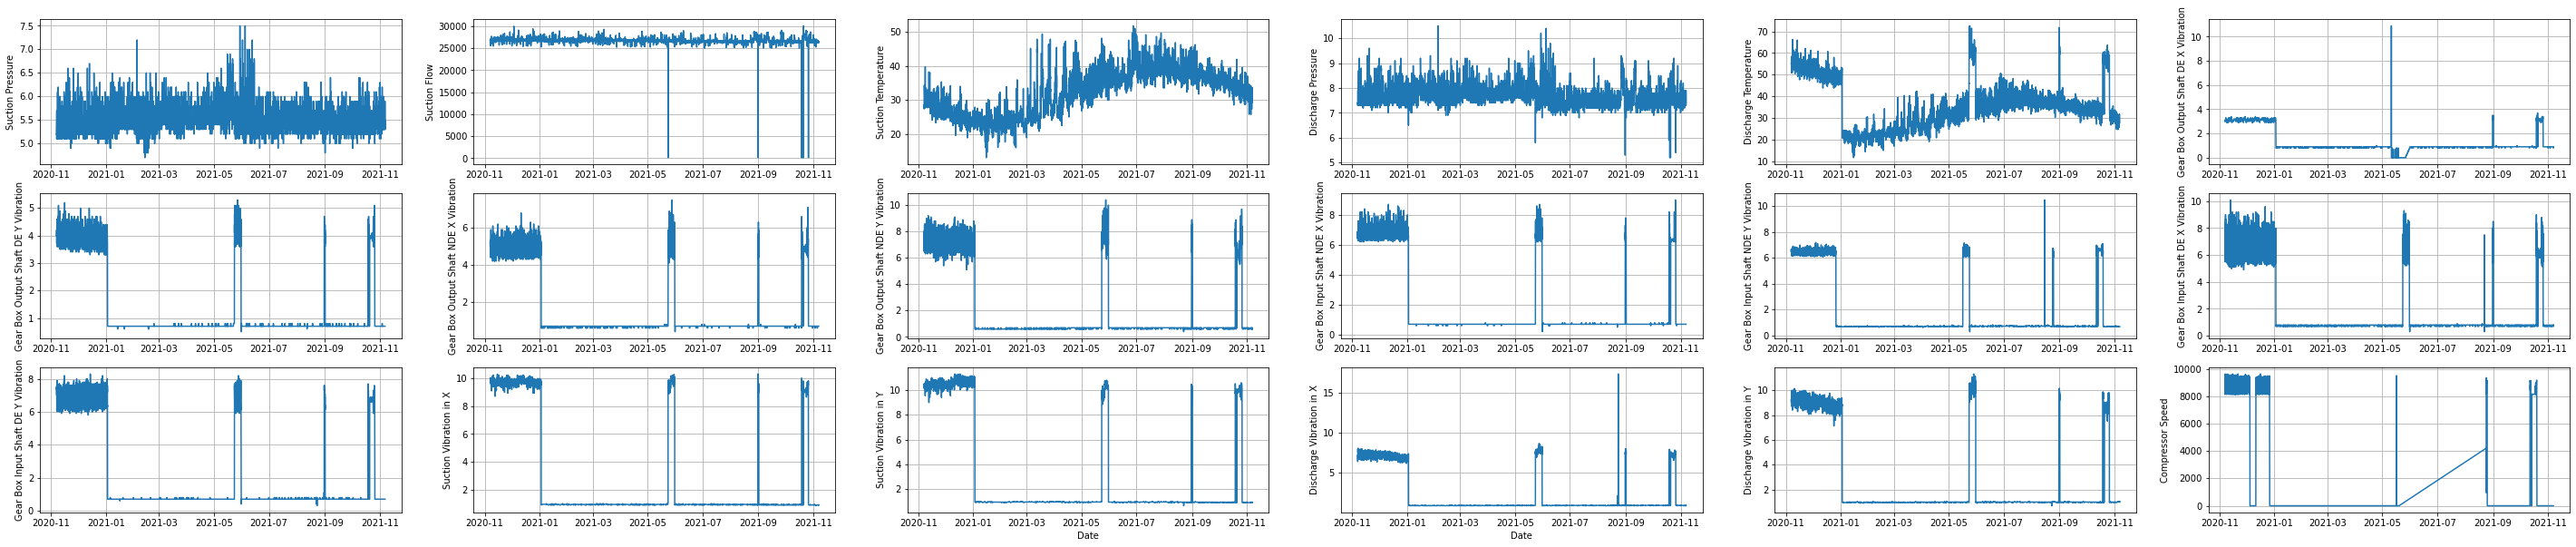

In [42]:
# visualize the data
fig, axs = plt.subplots(3,6, figsize=(50, 10))
axs[0,0].plot(df['Date/Time'], df['Suction Pressure (Bar Gauge without Atmospheric pressure)'])
axs[0,0].set_ylabel('Suction Pressure')
axs[0,0].grid()
axs[0,1].plot(df['Date/Time'], df['Suction Flow (Nominal m3/hr)'])
axs[0,1].grid()
axs[0,1].set_ylabel('Suction Flow')
axs[0,2].plot(df['Date/Time'], df['Suction Temperature (oC)'])
axs[0,2].grid()
axs[0,2].set_ylabel('Suction Temperature')
axs[0,3].plot(df['Date/Time'], df['Dischrage PreG1e without Atmospheric pressure)'])
axs[0,3].grid()
axs[0,3].set_ylabel('Discharge Pressure')
axs[0,4].plot(df['Date/Time'], df['Discharge Temperature (oC)'])
axs[0,4].grid()
axs[0,4].set_ylabel('Discharge Temperature')
axs[0,5].plot(df['Date/Time'], df['Gear Box Output Shaft Drive End (DE) X Vibration (μm)'])
axs[0,5].grid()
axs[0,5].set_ylabel('Gear Box Output Shaft DE X Vibration')

axs[1,0].plot(df['Date/Time'], df['Gear Box Output Shaft Drive End (DE) Y Vibration (μm)'])
axs[1,0].grid()
axs[1,0].set_ylabel('Gear Box Output Shaft DE Y Vibration')
axs[1,1].plot(df['Date/Time'], df['Gear Box Output Shaft Non Drive End (NDE) X Vibration (μm)'])
axs[1,1].grid()
axs[1,1].set_ylabel('Gear Box Output Shaft NDE X Vibration')
axs[1,2].plot(df['Date/Time'], df['Gear Box Output Shaft Non Drive End (NDE) Y Vibration (μm)'])
axs[1,2].grid()
axs[1,2].set_ylabel('Gear Box Output Shaft NDE Y Vibration')
axs[1,3].plot(df['Date/Time'], df['Gear Box Input Shaft Non Drive End (NDE) X Vibration (μm)'])
axs[1,3].grid()
axs[1,3].set_ylabel('Gear Box Input Shaft NDE X Vibration')
axs[1,4].plot(df['Date/Time'], df['Gear Box Input Shaft Drive End (NDE) Y Vibration (μm)'])
axs[1,4].grid()
axs[1,4].set_ylabel('Gear Box Input Shaft NDE Y Vibration')
axs[1,5].plot(df['Date/Time'], df['Gear Box Input Shaft Drive End (DE) X Vibration (μm)'])
axs[1,5].grid()
axs[1,5].set_ylabel('Gear Box Input Shaft DE X Vibration')

axs[2,0].plot(df['Date/Time'], df['Gear Box Input Shaft Drive End (DE) Y Vibration (μm)'])
axs[2,0].grid()
axs[2,0].set_ylabel('Gear Box Input Shaft DE Y Vibration')
axs[2,1].plot(df['Date/Time'], df['Suction Vibration in x'])
axs[2,1].grid()
axs[2,1].set_ylabel('Suction Vibration in X')
axs[2,2].plot(df['Date/Time'], df['Suction Vibration in y'])
axs[2,2].grid()
axs[2,2].set_ylabel('Suction Vibration in Y')
axs[2,2].set_xlabel('Date')
axs[2,3].plot(df['Date/Time'], df['Discharge Vibration in x'])
axs[2,3].grid()
axs[2,3].set_ylabel('Discharge Vibration in X')
axs[2,3].set_xlabel('Date')
axs[2,4].plot(df['Date/Time'], df['Discharge Vibration in y'])
axs[2,4].grid()
axs[2,4].set_ylabel('Discharge Vibration in Y')
axs[2,5].plot(df['Date/Time'], df['Compressor speed (RPM)'])
axs[2,5].grid()
axs[2,5].set_ylabel('Compressor Speed')

fig.savefig('ADNOC Features.png')

In [4]:
time=df['Date/Time']
suction_pressure_train=df['Suction Pressure (Bar Gauge without Atmospheric pressure)']

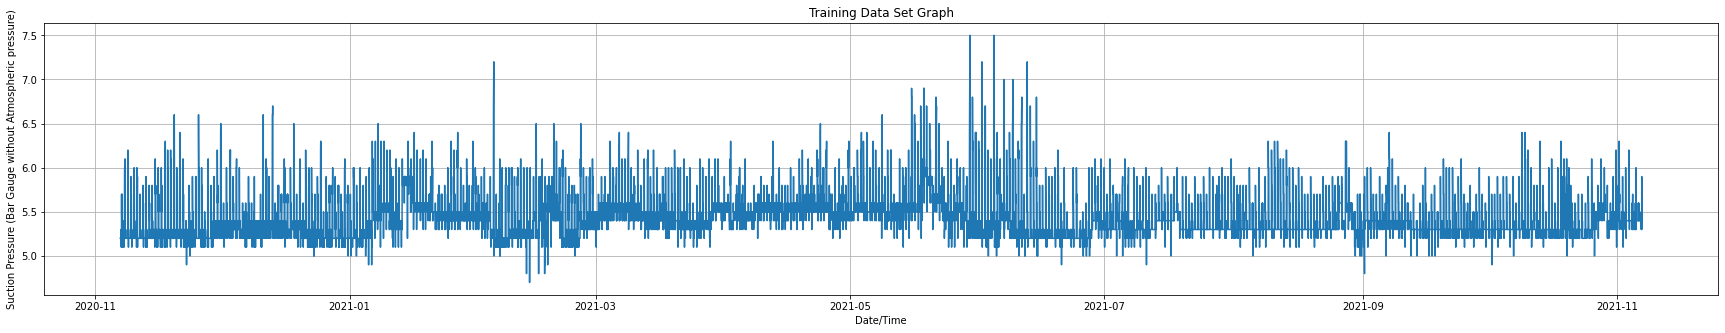

In [5]:
plt.figure(figsize=(30, 5))
plt.grid()
plt.title("Training Data Set Graph")
plt.xlabel("Date/Time")
plt.ylabel("Suction Pressure (Bar Gauge without Atmospheric pressure)")
plt.plot(time, suction_pressure_train)

In [6]:
dtr = {'Date': time, 'Training': suction_pressure_train}
dftr = pd.DataFrame(data=dtr)
dftr

,Date,Training
1,2020-11-07 00:00:00,5.2
2,2020-11-07 00:20:00,5.2
3,2020-11-07 00:40:00,5.2
4,2020-11-07 01:00:00,5.2
5,2020-11-07 01:20:00,5.2
...,...,...
26277,2021-11-06 22:40:00,5.4
26278,2021-11-06 23:00:00,5.4
26279,2021-11-06 23:20:00,5.4
26280,2021-11-06 23:40:00,5.4


In [7]:
mean=dftr['Training'].mean()
std=dftr['Training'].std()
print(mean)
print(std)

5.412392983524083
0.22172988123121062


In [8]:
dts = {'Date': time, 'Testing': suction_pressure_train}
dfts = pd.DataFrame(data=dts)

#To create our own labels, I added the mean and the standard deviation to the time period of the dataset

dfts['Testing'].iloc[5000:10000]=(dfts['Testing'].iloc[5000:10000]-mean+std)
dfts['Testing'].iloc[15000:20000]=(dfts['Testing'].iloc[15000:20000]+mean+std)
dfts

,Date,Testing
1,2020-11-07 00:00:00,5.2
2,2020-11-07 00:20:00,5.2
3,2020-11-07 00:40:00,5.2
4,2020-11-07 01:00:00,5.2
5,2020-11-07 01:20:00,5.2
...,...,...
26277,2021-11-06 22:40:00,5.4
26278,2021-11-06 23:00:00,5.4
26279,2021-11-06 23:20:00,5.4
26280,2021-11-06 23:40:00,5.4


In [9]:
dfts['Date'].iloc[15000]

Timestamp('2021-06-03 08:00:00')

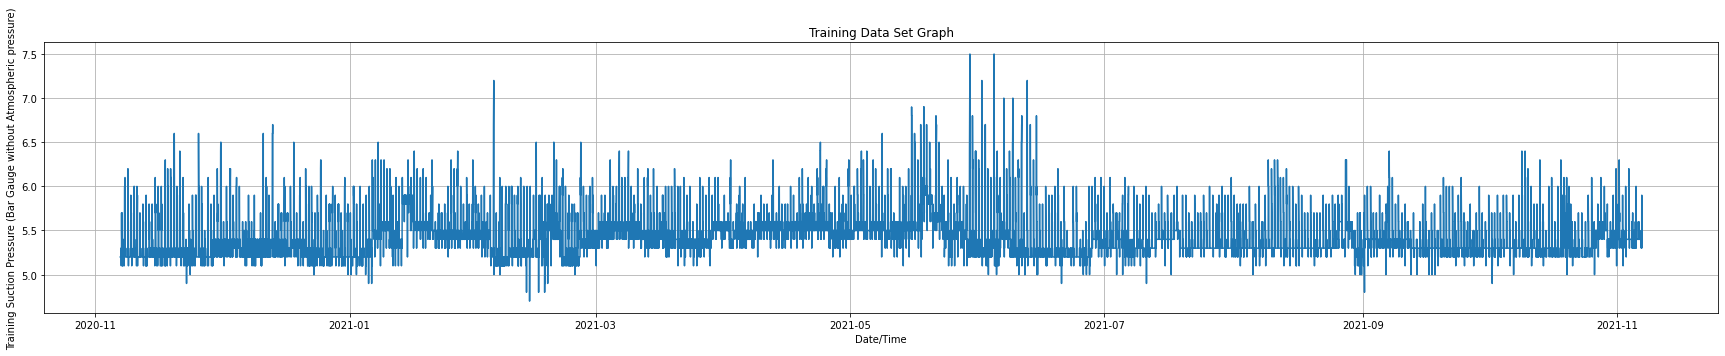

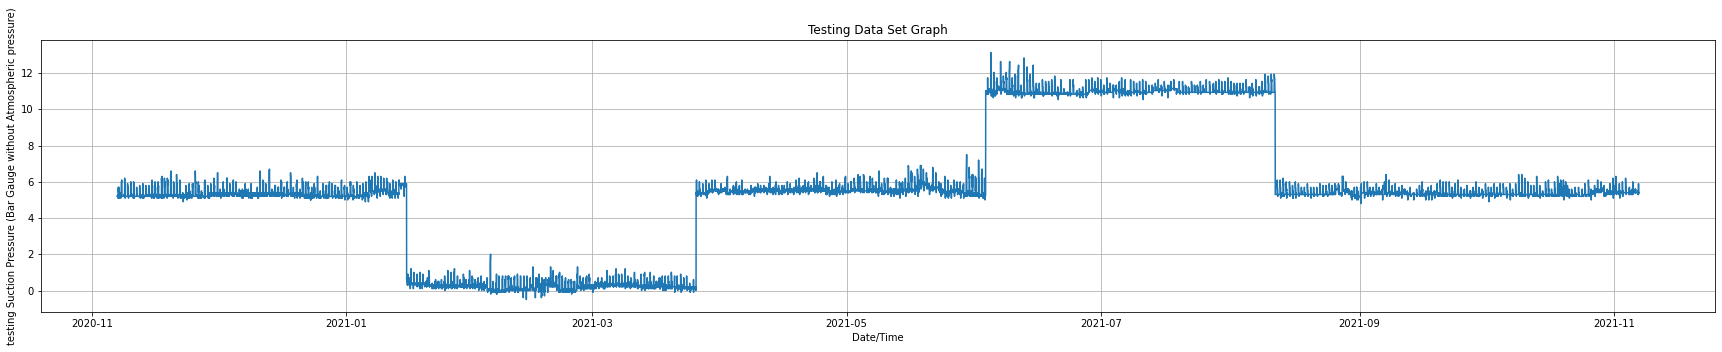

In [10]:
plt.figure(figsize=(30, 5))
plt.grid()
plt.title("Training Data Set Graph")
plt.xlabel("Date/Time")
plt.ylabel("Training Suction Pressure (Bar Gauge without Atmospheric pressure)")
plt.plot(dftr['Date'], dftr['Training'])

plt.figure(figsize=(30, 5))
plt.grid()
plt.title("Testing Data Set Graph")
plt.xlabel("Date/Time")
plt.ylabel("testing Suction Pressure (Bar Gauge without Atmospheric pressure)")
plt.plot(dfts['Date'], dfts['Testing'])

In [11]:
label_train=[]
for i in trange(len(dftr)):
        label_train.append(0)
        
label_train=np.array(label_train)

label_test=[]
for i in trange(len(dfts)):
    if dftr['Training'].iloc[i] == dfts['Testing'].iloc[i]:
        label_test.append(0)
    else:
        label_test.append(1)
        
label_test=np.array(label_test)

100%|██████████| 26281/26281 [00:00<00:00, 82418.90it/s]


In [12]:
dftr['Labeled Anomalies'] = label_train.tolist()
dftr

,Date,Training,Labeled Anomalies
1,2020-11-07 00:00:00,5.2,0
2,2020-11-07 00:20:00,5.2,0
3,2020-11-07 00:40:00,5.2,0
4,2020-11-07 01:00:00,5.2,0
5,2020-11-07 01:20:00,5.2,0
...,...,...,...
26277,2021-11-06 22:40:00,5.4,0
26278,2021-11-06 23:00:00,5.4,0
26279,2021-11-06 23:20:00,5.4,0
26280,2021-11-06 23:40:00,5.4,0


In [13]:
dfts['Labeled Anomalies'] = label_test.tolist()
dfts

,Date,Testing,Labeled Anomalies
1,2020-11-07 00:00:00,5.2,0
2,2020-11-07 00:20:00,5.2,0
3,2020-11-07 00:40:00,5.2,0
4,2020-11-07 01:00:00,5.2,0
5,2020-11-07 01:20:00,5.2,0
...,...,...,...
26277,2021-11-06 22:40:00,5.4,0
26278,2021-11-06 23:00:00,5.4,0
26279,2021-11-06 23:20:00,5.4,0
26280,2021-11-06 23:40:00,5.4,0


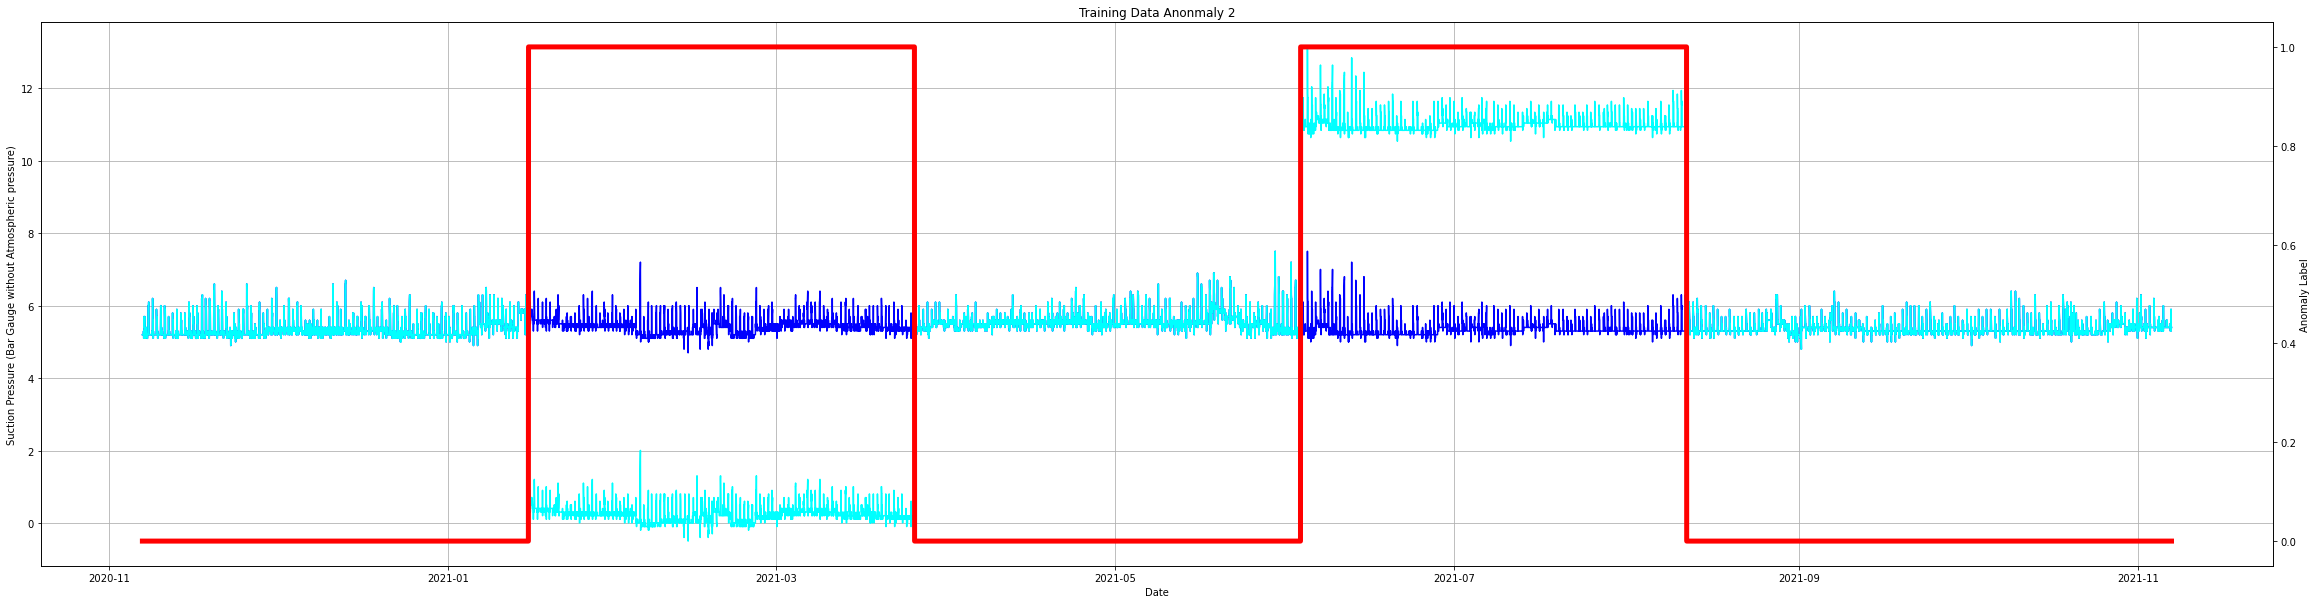

In [14]:
fig, ax2d = plt.subplots(figsize=(40,10))
plt.grid()
ax2a = ax2d.twinx()
ax2d.plot(dftr['Date'], dftr['Training'], color='blue')
ax2d.plot(dfts['Date'], dfts['Testing'], color='cyan')
ax2a.plot(dftr['Date'], dfts['Labeled Anomalies'], color='red', linewidth='5')
ax2d.set_xlabel('Date')
ax2d.set_ylabel('Suction Pressure (Bar Gauge without Atmospheric pressure)')
ax2a.set_ylabel('Anomaly Label')
ax2d.title.set_text('Training Data Anonmaly 2')

# LSTM Model 1

In [15]:
# import libraries
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import keras
from tensorflow.keras import layers
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.metrics import f1_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore")

import plotly.graph_objects as go

np.random.seed(1)
tf.random.set_seed(1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed, Bidirectional

2022-11-24 13:47:09.599884: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
 # Preprocessing: normalize the data in mean and variance
scaler = StandardScaler()
scaler = scaler.fit(dftr['Training'].to_numpy().reshape(-1,1))
dftr['Training'] = scaler.transform(dftr['Training'].to_numpy().reshape(-1,1))
trainSeqs=dftr['Training']

# Avoid leakage of information between train and test dataset
dfts['Testing'] = scaler.transform(dfts['Testing'].to_numpy().reshape(-1,1))
testSeqs=dfts['Testing']

In [17]:
trainSeqs.shape

(26281,)

In [18]:
testSeqs.shape

(26281,)

In [19]:
trainSeqs1=trainSeqs
testSeqs1=testSeqs

In [20]:
len(trainSeqs1)

26281

In [21]:
testSeqs1

1       -0.957909
2       -0.957909
3       -0.957909
4       -0.957909
5       -0.957909
           ...   
26277   -0.055893
26278   -0.055893
26279   -0.055893
26280   -0.055893
26281   -0.055893
Name: Testing, Length: 26281, dtype: float64

In [22]:
TIME_STEPS = 32
sample_predict=1

# Create the sequences of size TIME_STEPS to feed the sequential model
def to_sequences(x, y, TIME_STEPS=1):
    x_values = []
    y_values = []

    for i in range(len(x)-TIME_STEPS):
        x_values.append(x.iloc[i:(i+TIME_STEPS)])
        y_values.append(y.iloc[i+sample_predict:(i+TIME_STEPS+sample_predict)])
        
    return np.array(x_values), np.array(y_values)

# Stack the sequences obtained in each period to create a single training tensor
trainX = np.array([])
trainY = np.array([])
testX = np.array([])
testY = np.array([])


x, y = to_sequences(trainSeqs1, trainSeqs1, TIME_STEPS)
trainX = np.vstack([trainX, x]) if trainX.size else x
trainY = np.vstack([trainY, y]) if trainY.size else y
    

x, y = to_sequences(testSeqs1, testSeqs1, TIME_STEPS)
testX = np.vstack([testX, x]) if testX.size else x
testY = np.vstack([testY, y]) if testY.size else y

In [23]:
print(f"Train X shape: {trainX.shape[0]} batches, {trainX.shape[1]} values for each batch")
print(f"Train Y shape: {trainY.shape[0]} batches, {trainY.shape[1]} values for each batch")
print(f"Test X shape: {testX.shape[0]} batches, {testX.shape[1]} values for each batch")
print(f"Test Y shape: {testY.shape[0]} batches, {testY.shape[1]} values for each batch")

Train X shape: 26249 batches, 32 values for each batch
Train Y shape: 26249 batches, 32 values for each batch
Test X shape: 26249 batches, 32 values for each batch
Test Y shape: 26249 batches, 32 values for each batch


In [24]:
learning_rate=0.2 #0.2 default

model = Sequential()
model.add(layers.LSTM(128, input_shape=(trainX.shape[1], 1)))
model.add(layers.Dropout(rate=learning_rate))

model.add(layers.RepeatVector(trainX.shape[1]))

model.add(layers.LSTM(128, return_sequences=True))
model.add(layers.Dropout(rate=learning_rate))
model.add(layers.TimeDistributed(layers.Dense(1)))
model.compile(optimizer='adam', loss='mae')
model.summary()

2022-11-24 13:47:22.560738: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 repeat_vector (RepeatVector  (None, 32, 128)          0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 32, 128)           131584    
                                                                 
 dropout_1 (Dropout)         (None, 32, 128)           0         
                                                                 
 time_distributed (TimeDistr  (None, 32, 1)            129       
 ibuted)                                                

In [25]:
# Fit model
history = model.fit(trainX, trainY, epochs=50, batch_size=32, validation_split=0.1, verbose=1, callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ])

Epoch 1/50
739/739 [==============================] - 62s 81ms/step - loss: 0.3223 - val_loss: 0.2220
Epoch 2/50
739/739 [==============================] - 70s 94ms/step - loss: 0.2590 - val_loss: 0.2102
Epoch 3/50
739/739 [==============================] - 66s 89ms/step - loss: 0.2489 - val_loss: 0.1981
Epoch 4/50
739/739 [==============================] - 56s 76ms/step - loss: 0.2390 - val_loss: 0.1924
Epoch 5/50
739/739 [==============================] - 55s 74ms/step - loss: 0.2340 - val_loss: 0.1974
Epoch 6/50
739/739 [==============================] - 76s 103ms/step - loss: 0.2292 - val_loss: 0.1777
Epoch 7/50
739/739 [==============================] - 79s 107ms/step - loss: 0.2232 - val_loss: 0.1701
Epoch 8/50
739/739 [==============================] - 69s 93ms/step - loss: 0.2190 - val_loss: 0.1660
Epoch 9/50
739/739 [==============================] - 74s 101ms/step - loss: 0.2126 - val_loss: 0.1595
Epoch 10/50
739/739 [==============================] - 81s 110ms/step - loss: 0

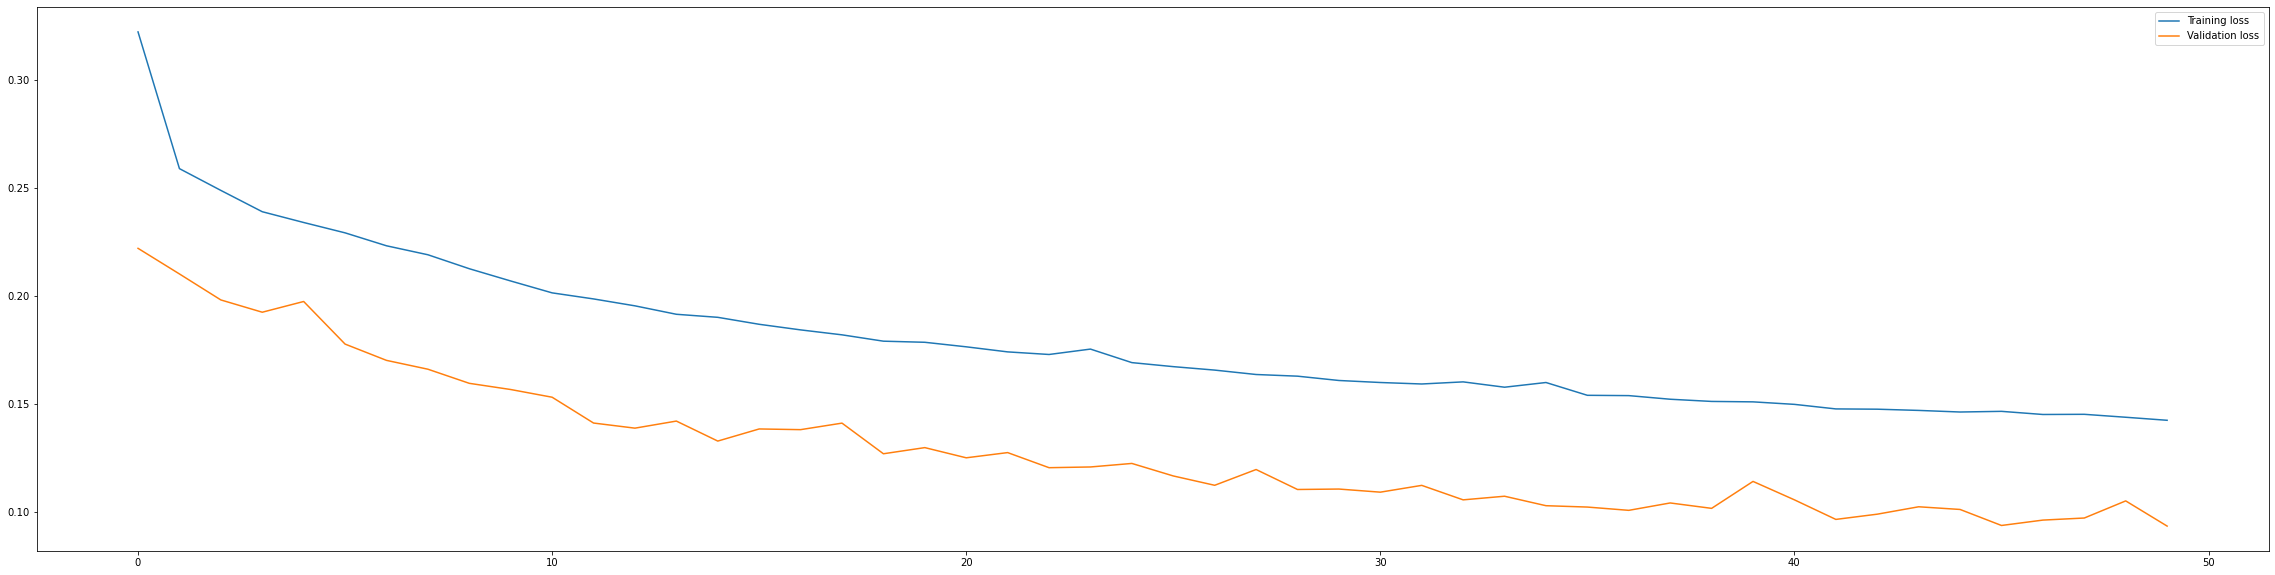

In [26]:
# Plot the training and validation loss 
plt.figure(figsize=(40,10))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

821/821 [==============================] - 37s 45ms/step


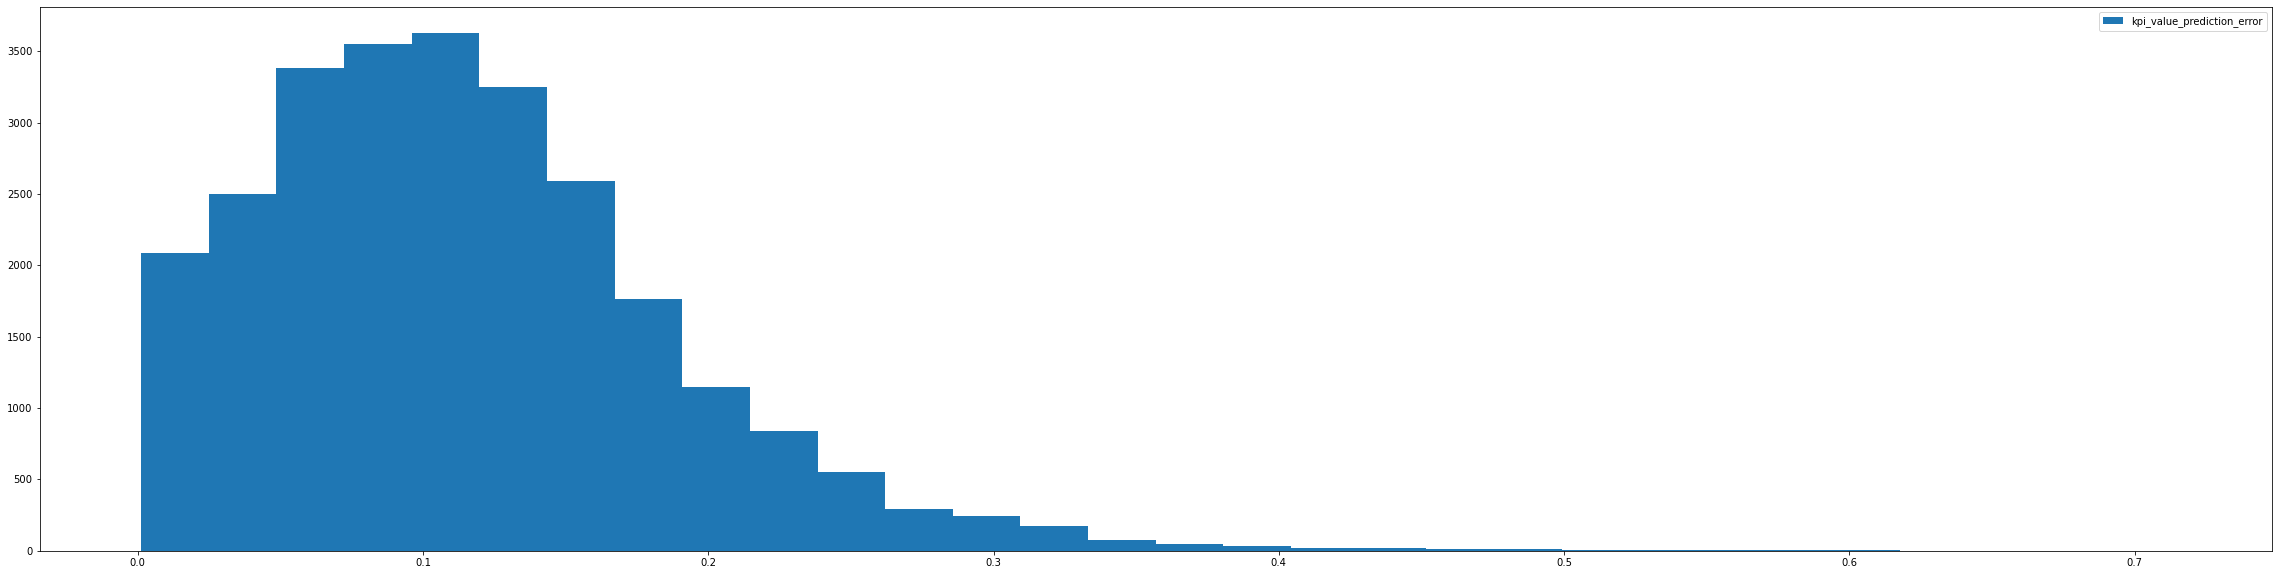

In [27]:
# Plot a histogram of the reconstruction error in the training dataset to decide a threshold

trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict.squeeze() - trainY), axis=1)
plt.figure(figsize=(40,10));
plt.hist(trainMAE, bins=30);
plt.legend(['kpi_value_prediction_error'])
threshold_trainMAE = 0.3  #or Define 90% value of max as threshold.

821/821 [==============================] - 61s 75ms/step


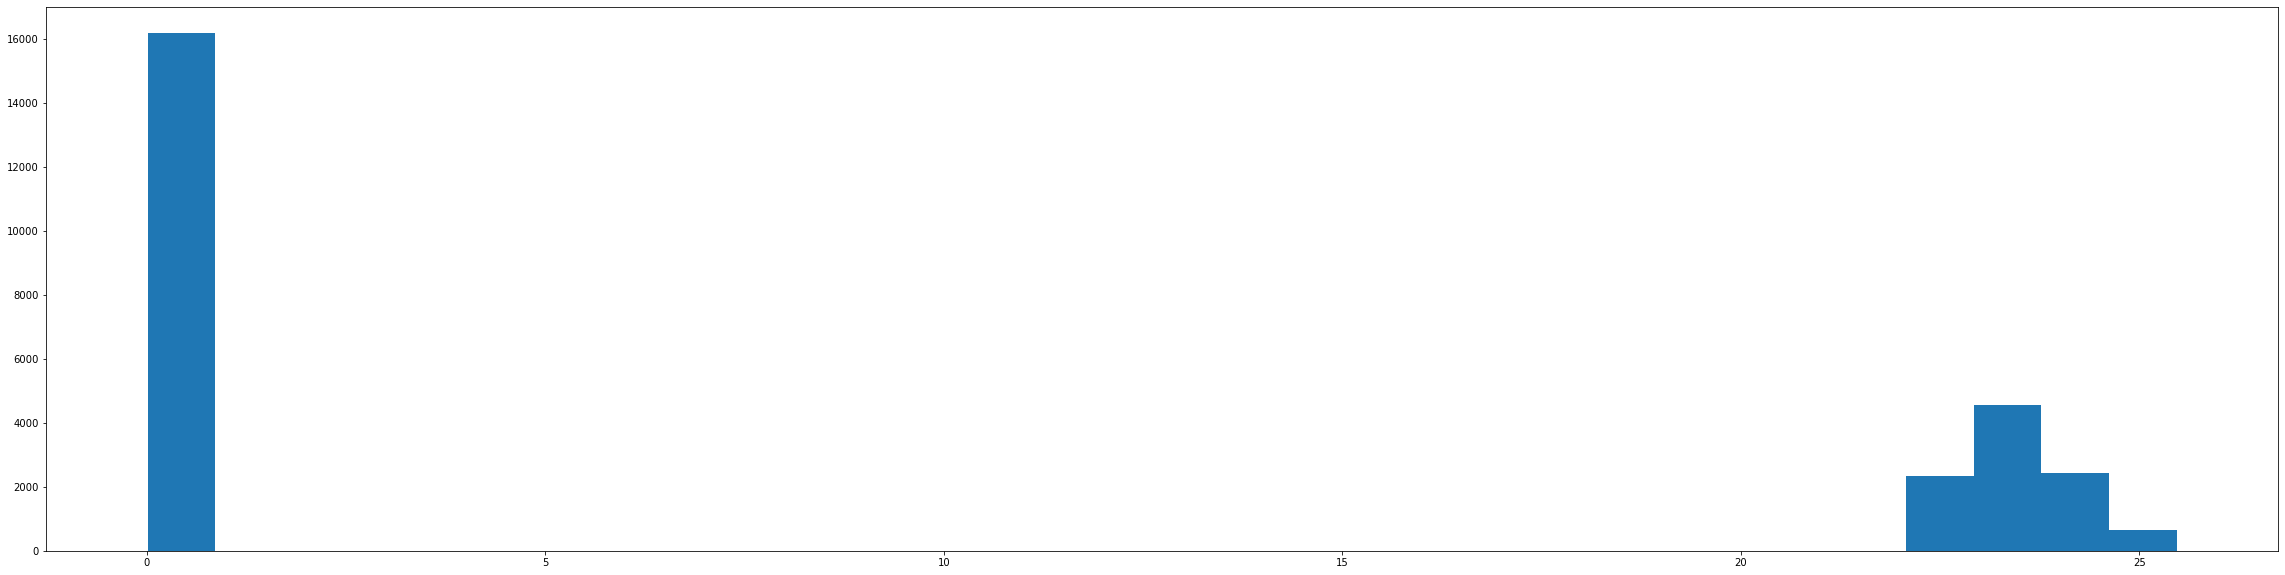

In [28]:
# Histogram of the testing MAE
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict.squeeze() - testY), axis=1)
plt.figure(figsize=(40,10));
plt.hist(testMAE, bins=30);

In [29]:
# Detect anomaly if the reconstruction loss for a sample is greater than the threshold

anomaly_df=dfts[TIME_STEPS:]
anomaly_df['testMAE'] = testMAE
anomaly_df['threshold_trainMAE'] = threshold_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['threshold_trainMAE']
anomaly_df

,Date,Testing,Labeled Anomalies,testMAE,threshold_trainMAE,anomaly
33,2020-11-07 10:40:00,-0.506901,0,0.097579,0.3,False
34,2020-11-07 11:00:00,-0.957909,0,0.096358,0.3,False
35,2020-11-07 11:20:00,-0.957909,0,0.107913,0.3,False
36,2020-11-07 11:40:00,-0.957909,0,0.109200,0.3,False
37,2020-11-07 12:00:00,-0.957909,0,0.109412,0.3,False
...,...,...,...,...,...,...
26277,2021-11-06 22:40:00,-0.055893,0,0.080829,0.3,False
26278,2021-11-06 23:00:00,-0.055893,0,0.089346,0.3,False
26279,2021-11-06 23:20:00,-0.055893,0,0.091074,0.3,False
26280,2021-11-06 23:40:00,-0.055893,0,0.089249,0.3,False


In [30]:
# Inspect the resulting dataset
anomaly_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26249 entries, 33 to 26281
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                26249 non-null  datetime64[ns]
 1   Testing             26249 non-null  float64       
 2   Labeled Anomalies   26249 non-null  int64         
 3   testMAE             26249 non-null  float64       
 4   threshold_trainMAE  26249 non-null  float64       
 5   anomaly             26249 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 1.2 MB


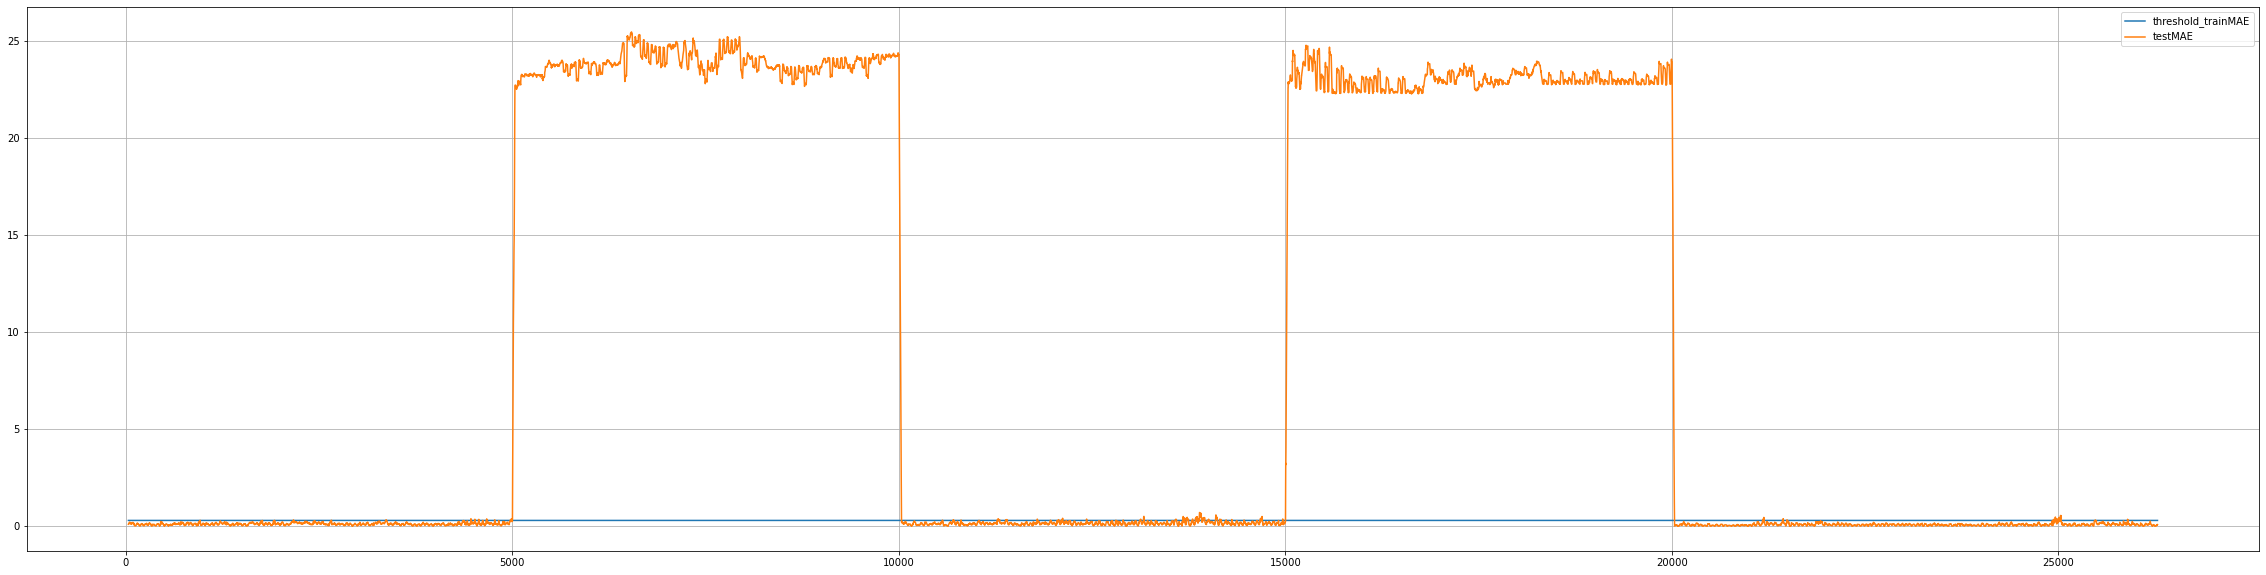

In [31]:
# Plot the test MAE
plt.figure(figsize=[40, 10])
anomaly_df['threshold_trainMAE'].plot()
anomaly_df['testMAE'].plot()
plt.grid()
plt.legend()

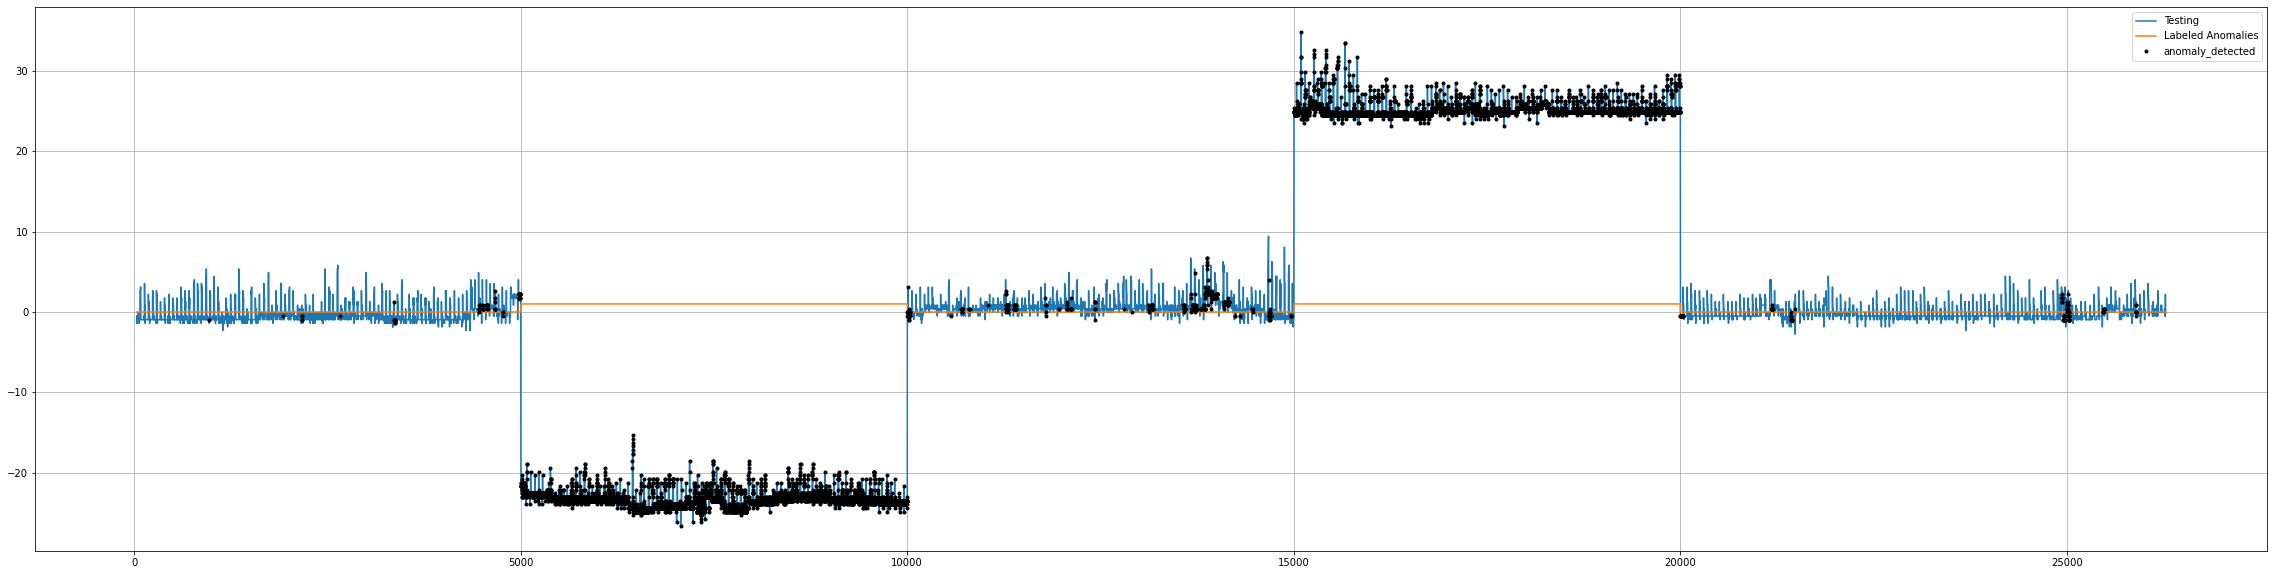

In [32]:
# Detect the anomaly points inside the dataset
anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]

#Plot the anomalies
plt.figure(figsize=(40,10))
anomaly_df['Testing'].plot()
anomaly_df['Labeled Anomalies'].plot()
anomalies['Testing'].plot(marker='.', linestyle='None', label='anomaly_detected', color='black')
plt.grid()
plt.legend()

In [33]:
# Compute the precision in the test dataset
precision=precision_score(anomaly_df['Labeled Anomalies'], anomaly_df['anomaly'])
print(f"Precision: {round(precision, 3)}")
# Compute the recall in the test dataset
recall=recall_score(anomaly_df['Labeled Anomalies'], anomaly_df['anomaly'])
print(f"Recall: {round(recall, 3)}")
# Compute the F1 score in the test dataset
f1_score=f1_score(anomaly_df['Labeled Anomalies'], anomaly_df['anomaly'])
print(f"F1 Score: {round(f1_score, 3)}")

Precision: 0.946
Recall: 1.0
F1 Score: 0.972


From the results, we had added and additive anomalies for the testing copy of the original dataset and as expected, the F1 score is almost close to one.